In [1]:

import os
import numpy as np
import pickle
from matplotlib import pyplot as plt
from astropy import units as u
from astropy.io import ascii
from astropy.table import unique
from astropy.table import Table
import numpy as np
from astropy.io import ascii
from astropy import units as u
from astropy.table import Column
from astroquery.vizier import Vizier

from astropy.coordinates import SkyCoord, Distance
from astropy.io import fits
from astropy.table import QTable

from astropy.utils.data import download_file
from astroquery.gaia import Gaia

Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"

import astropy.units as u

from astropy.coordinates import SkyCoord

from astroquery.gaia import Gaia
#NGC2266
cra=6+42/60+52.0/3600
cdec=27+22/60+56/3600
coord = SkyCoord(ra=cra,dec=cdec, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(1, u.deg)

height = u.Quantity(1, u.deg)
Gaia.ROW_LIMIT=-1
gaia_table = Gaia.query_object_async(coordinate=coord, width=width, height=height)




#with open('gaia_table.pickle', 'wb') as handle:
#    pickle.dump(gaia_table, handle, protocol=pickle.HIGHEST_PROTOCOL)


INFO: Query finished. [astroquery.utils.tap.core]


In [2]:
Empty=np.asarray(gaia_table['ra'])
Empty=np.stack((Empty, np.asarray(gaia_table['dec'])), axis=1)
Empty=np.column_stack([Empty, np.asarray(gaia_table['phot_g_mean_mag'])])

MEAN=np.mean(Empty[:,2])
MAX=np.max(Empty[:,2])
MIN=np.argmin(Empty[:,2])
STD=np.sqrt(np.sum((Empty[:,2]-MEAN)**2)/len(Empty[:,2]))
#print(STD)
#print(MEAN)

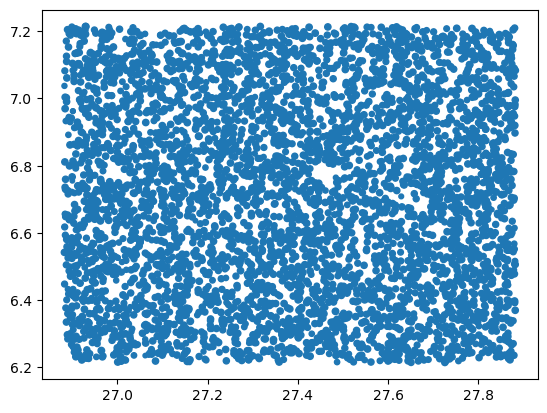

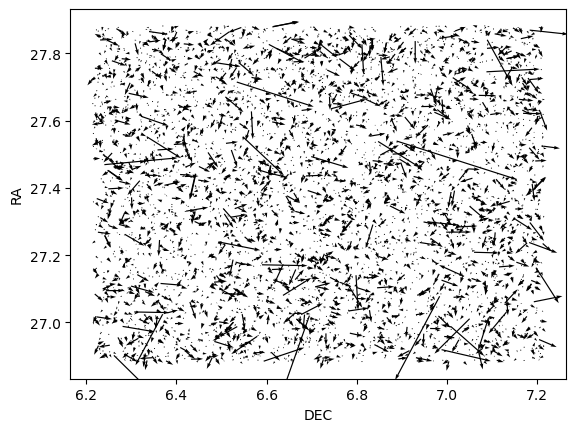

In [3]:
plt.scatter(gaia_table['dec'],gaia_table['ra'],s=gaia_table['phot_g_mean_mag'])
plt.show()

fig, ax = plt.subplots()

ax.quiver(gaia_table['ra'].filled(0),gaia_table['dec'].filled(0),gaia_table['pmra'].filled(0),gaia_table['pmdec'].filled(0))
plt.xlabel('DEC')
plt.ylabel('RA')
plt.show()

plt.close()

In [4]:
l = Vizier(catalog='MSX6C',columns=['*'])
l.ROW_LIMIT = -1
result_l = l.query_region(coord,width=1*u.deg)
msx_table = result_l
print(msx_table)


Empty TableList


In [5]:

gair = Vizier(catalog='I/355/gaiadr3',columns=['*','e_Gmag'])
gair.ROW_LIMIT = -1
result_gr = gair.query_region(coord,width=1*u.deg)
gair_table = result_gr[0]

In [6]:
#print(gair_table.columns)
gair_table.sort('Gmag')
bright = gair_table[:100]
#gaia_table.sort('phot_g_mean_mag')
#br_st = gaia_table[:100]
#print(bright)


In [7]:
from astroquery.xmatch import XMatch
xm2ms = XMatch.query(cat1=bright,cat2='vizier:II/246/out',max_distance=0.5* u.arcsec, colRA1='RAJ2000',colDec1='DEJ2000')
print(len(xm2ms))

Could not import regions, which is required for some of the functionalities of this module.
99


In [8]:
xwise = XMatch.query(cat1=xm2ms, cat2="vizier:II/311/wise", max_distance=0.5 * u.arcsec,colRA1="RAJ2000_1", colDec1="DEJ2000_1")
print(len(xwise))

93


In [9]:
xall = XMatch.query(cat1=xwise, cat2="vizier:II/349/ps1", max_distance=0.5 * u.arcsec,colRA1="ra", colDec1="dec")
print(len(xall))
xall=xall.filled()

92


In [10]:
xall["Gmag"] = 3229 * 10 ** (-0.4 * xall["Gmag"])*u.Jy
xall["e_Gmag"] = 3229 * 10 ** (-0.4 * xall["e_Gmag"])*u.Jy

# 2MASS
xall["Jmag_1"] = 1594 * 10 ** (-0.4 * xall["Jmag_1"])*u.Jy
xall["Hmag_1"] = 1024 * 10 ** (-0.4 * xall["Hmag_1"])*u.Jy
xall["Kmag_1"] = 666.8 * 10 ** (-0.4 * xall["Kmag_1"])*u.Jy

xall["e_Jmag_1"] = 1594 * 10 ** (-0.4 * xall["e_Jmag_1"])*u.Jy
xall["e_Hmag_1"] = 1024 * 10 ** (-0.4 * xall["e_Hmag_1"])*u.Jy
xall["e_Kmag_1"] = 666.8 * 10 ** (-0.4 * xall["e_Kmag_1"])*u.Jy

In [11]:
#flux wise=https://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html

xall["W1mag"] = 309.54 * 10 ** (-0.4 * xall["W1mag"])*u.Jy
xall["W2mag"] = 171.79 * 10 ** (-0.4 * xall["W2mag"])*u.Jy
xall["W3mag"] = 31.676 * 10 ** (-0.4 * xall["W3mag"])*u.Jy
xall["W4mag"] = 8.3635 * 10 ** (-0.4 * xall["W4mag"])*u.Jy
xall['e_W1mag']=xall['e_W1mag']*0.4*309.54*10**(-0.4*xall['W1mag'])*np.log(10)*u.Jy
xall['e_W2mag']=xall['e_W2mag']*0.4*171.79*10**(-0.4*xall['W2mag'])*np.log(10)*u.Jy
xall['e_W3mag']=xall['e_W3mag']*0.4*31.676*10**(-0.4*xall['W3mag'])*np.log(10)*u.Jy
xall['e_W4mag']=xall['e_W4mag']*0.4*8.3635*10**(-0.4*xall['W4mag'])*np.log(10)*u.Jy

#wavelength w1=3352.6 w2=4602.8 w3=11560.8 w4=22088.3 m

In [12]:
#flux panstar
#The PS1 camera surveyed the sky using 5 filters: g, r, i, z, and y. The effective wavelengths (and spectral resolutions) of these 5 filters are 481 nm (R = 3.5), 617 nm (R = 4.4), 752 nm (R = 5.8), 866 nm (R = 8.3), and 962 nm (R = 11.6), respectively. Please refer to Table 4 in Tonry et al. (2012) for bandpass details. Schlafly et al. (2012) provides updated zeropoints in Table 1.
xall["gmag"] = 3964.03 * 10 ** (-0.4 * xall["gmag"])*u.Jy
xall["rmag"] = 3173.02 * 10 ** (-0.4 * xall["rmag"])*u.Jy
xall["imag"] = 2575.36 * 10 ** (-0.4 * xall["imag"])*u.Jy
xall["zmag"] = 2261.81 * 10 ** (-0.4 * xall["zmag"])*u.Jy
xall["ymag"] = 2180.40 * 10 ** (-0.4 * xall["ymag"])*u.Jy

xall['e_gmag']=xall['e_gmag']*0.4*3964.03*10**(-0.4*xall['gmag'])*np.log(10)*u.Jy
xall['e_rmag']=xall['e_rmag']*0.4*3173.02*10**(-0.4*xall['rmag'])*np.log(10)*u.Jy
xall['e_imag']=xall['e_imag']*0.4*2575.36*10**(-0.4*xall['imag'])*np.log(10)*u.Jy
xall['e_zmag']=xall['e_zmag']*0.4*3173.02*10**(-0.4*xall['zmag'])*np.log(10)*u.Jy
xall['e_ymag']=xall['e_ymag']*0.4*3173.02*10**(-0.4*xall['ymag'])*np.log(10)*u.Jy

#wavelength g=4810.16 r=6155.47 i=7503.03 z=8668.36 y=9613.6 m


[2.60201733e+03 2.73799039e-17]
Global minimum value: 9.933419675643265e-05
temp associated with global minimum: 5736.8421052631575
dillution associated with global minimum: 5.263157894737315e-11


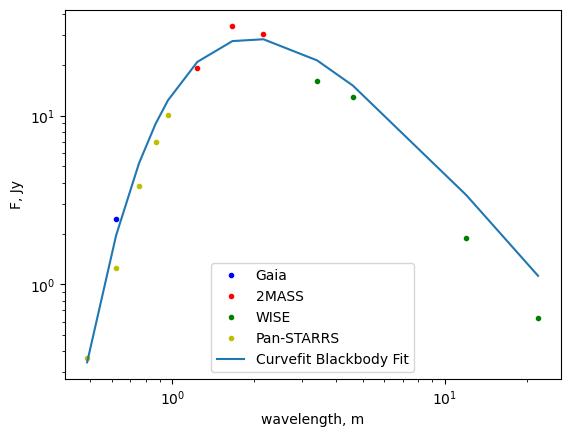

[8.12089850e+03 4.97664888e-20]
Global minimum value: 9.933419675643265e-05
temp associated with global minimum: 5736.8421052631575
dillution associated with global minimum: 5.263157894737315e-11


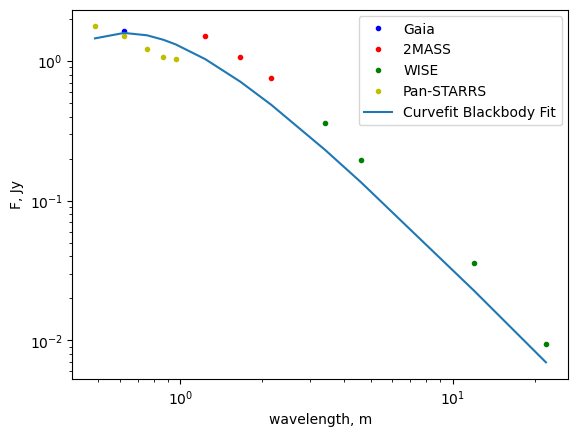

In [65]:
from astropy.modeling import models
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.optimize import Bounds
from astropy.modeling.models import BlackBody
from scipy.optimize import minimize
from itertools import cycle

for i in range(2):
    fig, ax = plt.subplots()
    
    ax.plot(0.622, xall["Gmag"][i], ".b",label='Gaia')
    
    ax.plot(1.235, xall["Jmag_1"][i], ".r")
    ax.plot(1.662, xall["Hmag_1"][i], ".r")
    ax.plot(2.159, xall["Kmag_1"][i], ".r", label="2MASS")
    
    ax.plot(3.4, xall["W1mag"][i], ".g", label="WISE")
    ax.plot(4.6, xall["W2mag"][i], ".g")
    ax.plot(12, xall["W3mag"][i], ".g")
    ax.plot(22, xall["W4mag"][i], ".g")
    
    ax.plot(0.4866, xall["gmag"][i], ".y")
    ax.plot(0.6215, xall["rmag"][i], ".y")
    ax.plot(0.7545, xall["imag"][i], ".y")
    ax.plot(0.8679, xall["zmag"][i], ".y")
    ax.plot(0.9633, xall["ymag"][i], ".y", label="Pan-STARRS")
    ax.set_xlabel(r"wavelength, m")
    ax.set_ylabel(r"F, Jy")
    
    ax.legend()
    
    wavelengths=np.array([0.622,1.235,1.662,2.159,3.4,4.6,12,22,0.4866,0.6215,0.7545,0.8679,0.9633])
    Flux=np.array([xall["Gmag"][i], xall["Jmag_1"][i],xall["Hmag_1"][i],xall["Kmag_1"][i],xall["W1mag"][i],xall["W2mag"][i] ,xall["W3mag"][i],xall["W4mag"][i],xall["gmag"][i] ,xall["rmag"][i],xall["imag"][i] ,xall["zmag"][i],xall["ymag"][i]])
    Errors=np.array([xall["e_Gmag"][i], xall["e_Jmag_1"][i],xall["e_Hmag_1"][i],xall["e_Kmag_1"][i],xall["e_W1mag"][i],xall["e_W2mag"][i] ,xall["e_W3mag"][i],xall["e_W4mag"][i],xall["e_gmag"][i] ,xall["e_rmag"][i],xall["e_imag"][i] ,xall["e_zmag"][i],xall["e_ymag"][i]])
    def blackbody(wavelength, temp, dilution):
        mod=models.BlackBody(temperature=temp*u.K)
        blackb=(mod(wavelength * u.um)).to(u.Jy/u.sr) * np.pi * dilution
        return blackb.value
        
    initial_params = [5000, 1e-20]
    lower_bounds = [1000, 1e-23]
    upper_bounds = [20000, 1e-10]
    params, cov = curve_fit(blackbody, wavelengths, Flux, p0=initial_params, bounds=(lower_bounds, upper_bounds))
    waves=np.sort(wavelengths)
    temperature_fit,dilution_fit=params
    print(params)
    flux_fit = blackbody(waves,temperature_fit, dilution_fit )
    ax.plot(waves, flux_fit, label='Curvefit Blackbody Fit')
    temper=np.linspace(1000,10000,20)
   
    dill=np.linspace(1e-23,1e-10,20)
    
    def chi_square(params):
        d = params[:len(params)//2]
        t = params[len(params)//2:]
        wavelengths=np.array([0.622,1.235,1.662,2.159,3.4,4.6,12,22,0.4866,0.6215,0.7545,0.8679,0.9633])
        Flux=np.array([xall["Gmag"][i], xall["Jmag_1"][i],xall["Hmag_1"][i],xall["Kmag_1"][i],xall["W1mag"][i],xall["W2mag"][i] ,xall["W3mag"][i],xall["W4mag"][i],xall["gmag"][i] ,xall["rmag"][i],xall["imag"][i] ,xall["zmag"][i],xall["ymag"][i]])
        Errors=np.array([xall["e_Gmag"][i], xall["e_Jmag_1"][i],xall["e_Hmag_1"][i],xall["e_Kmag_1"][i],xall["e_W1mag"][i],xall["e_W2mag"][i] ,xall["e_W3mag"][i],xall["e_W4mag"][i],xall["e_gmag"][i] ,xall["e_rmag"][i],xall["e_imag"][i] ,xall["e_zmag"][i],xall["e_ymag"][i]])
        flux_model = blackbody(wavelengths,t, d)
        residuals = ((Flux - flux_model)**2)/(Errors**2)
        chi=np.sum(residuals)       
        return chi
    initial_t = np.array(temper)
    initial_d = np.array(dill)


    parameter_pairs = [(t_val, d_val) for t_val, d_val in zip(initial_t, initial_d)]


    def minimize_function(params):
        return chi_square(params)


    global_min_value = np.inf
    global_min_t = None
    global_min_d = None

    for i, (t_val, d_val) in enumerate(parameter_pairs):
        min_params, min_value, _, _, _ = optimize.fmin(minimize_function, (t_val, d_val), full_output=True,disp=False)

        if min_value < global_min_value:
            global_min_value = min_value
            global_min_t = min_params[0]
            global_min_d = min_params[1]


    print("Global minimum value:", global_min_value)
    print("temp associated with global minimum:", global_min_t)
    print("dillution associated with global minimum:", global_min_d)
    #fl_fit = blackbody(waves,global_min_t,global_min_d )
    #ax.plot(waves, fl_fit, label='Chi Blackbody Fit')
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    plt.close()
    

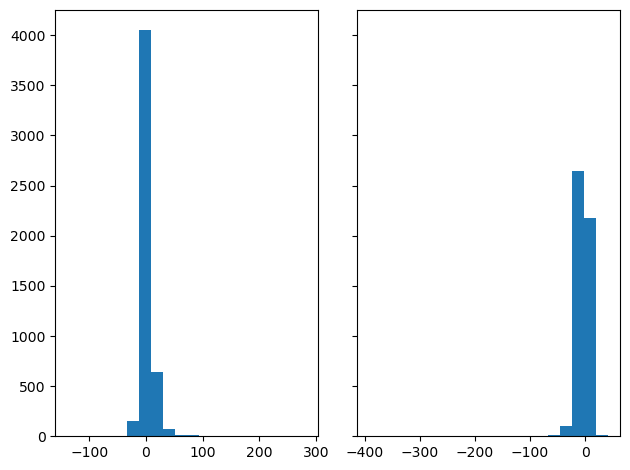

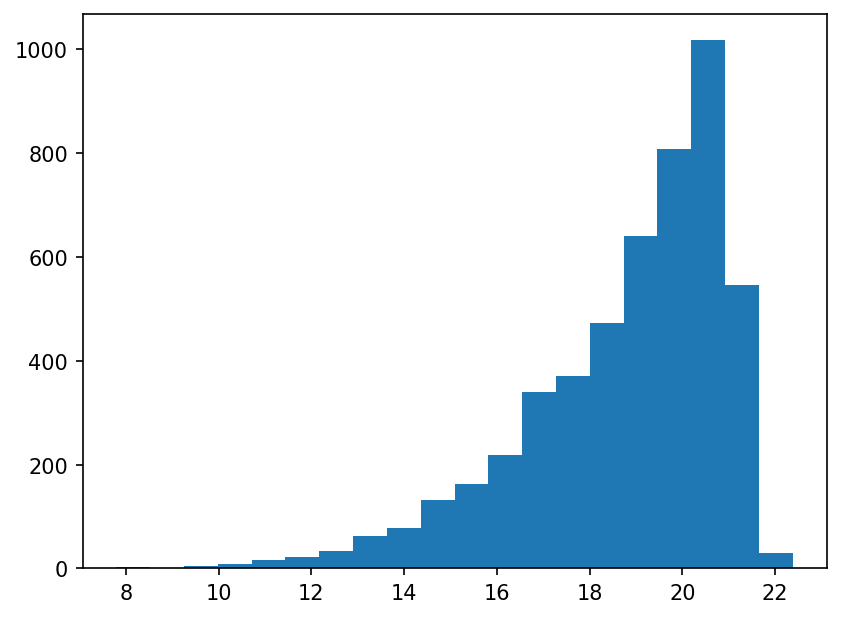

In [126]:
#histograms for Gmag and proper motions

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

N_points = 100000
n_bins = 20


dist1 = gaia_table['pmra'].filled(0)
dist2=gaia_table['pmdec'].filled(0)
fig, ax = plt.subplots(1,2, sharey=True, tight_layout=True)


ax[0].hist(dist1, bins=n_bins)
ax[1].hist(dist2, bins=n_bins)
plt.show()
N_points = 100000
n_bins = 20


dist1 = gaia_table['phot_g_mean_mag']
fig, ax = plt.subplots(dpi=150)


ax.hist(dist1, bins=n_bins)

plt.show()

In [127]:
#diff example
from sympy import *
import numpy as np
l, theta, h = symbols('l theta h')
n=2
N=2
h=2
init_printing(use_unicode=True)
expr = np.pi**2*(n**2-1)**2/2*h/N*1/l**4*(1+cos(theta)**2)

print(diff(expr, l, theta,h))

-355.305758439217*(sin(theta)**2 - cos(theta)**2)/l**5
